In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

seed_value = 42

Breast cancer dataset

In [54]:
features_df = pd.read_csv('data/breast_cancer_data_features.csv')
labels = pd.read_csv('data/breast_cancer_data_targets.csv')

labels = labels.map(lambda x : 0 if x == 'B' else 1)

# Standardize
scaler = StandardScaler()
features_df = scaler.fit_transform(features_df)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=seed_value)

labels.value_counts()

Diagnosis
0            357
1            212
Name: count, dtype: int64

In [55]:
kmeans = KMeans(n_clusters=2, random_state=42)
cluster_labels = kmeans.fit_predict(X_train)
# cluster_labels

In [70]:
y_train.to_numpy().reshape(-1)

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,

In [71]:
# Checking if cluster labels line up
np.unique((cluster_labels == y_train.to_numpy().reshape(-1)), return_counts=True)

(array([False,  True]), array([ 46, 409]))

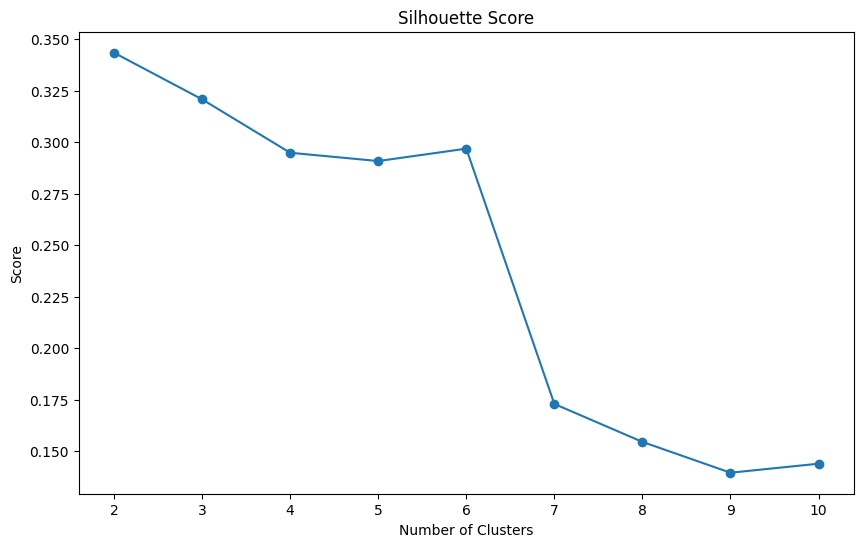

In [27]:
# Checking silhouette score
scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    cluster_labels = kmeans.fit_predict(X_train)
    scores.append(silhouette_score(X_train, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

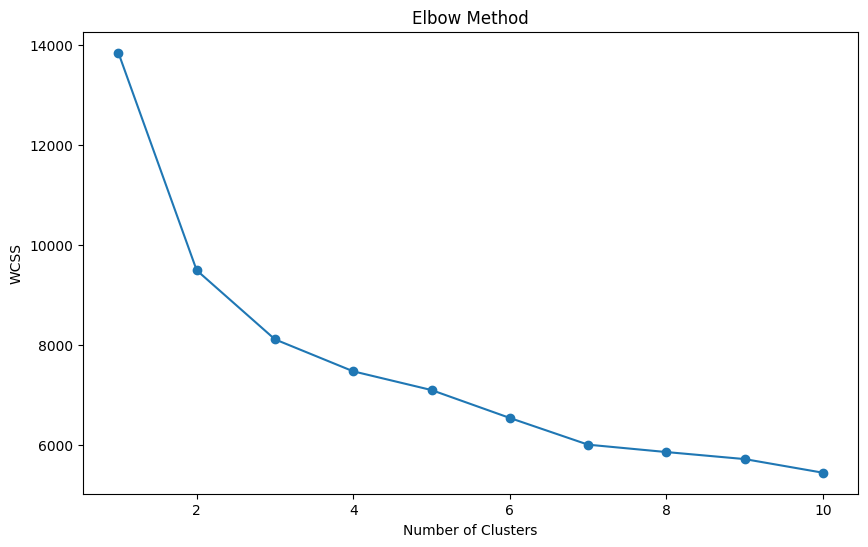

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

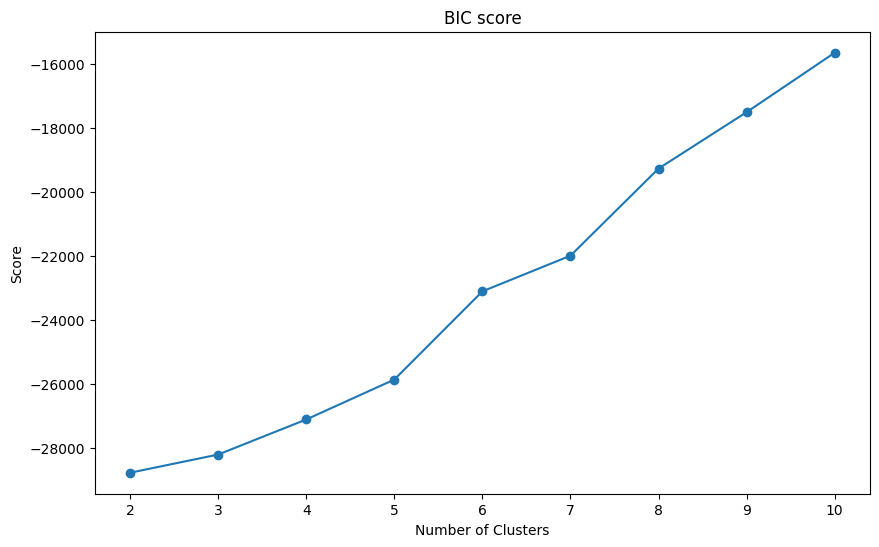

In [39]:
# gmm

# Fit GMM model
from sklearn.mixture import GaussianMixture

bic_scores = []
aic_scores = []
for k in range(2,11):
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_train)
    labels = gmm.predict(X_train)

    # Calculate BIC and AIC
    bic_scores.append(gmm.bic(X_train))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), bic_scores, marker='o')
plt.title('BIC score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

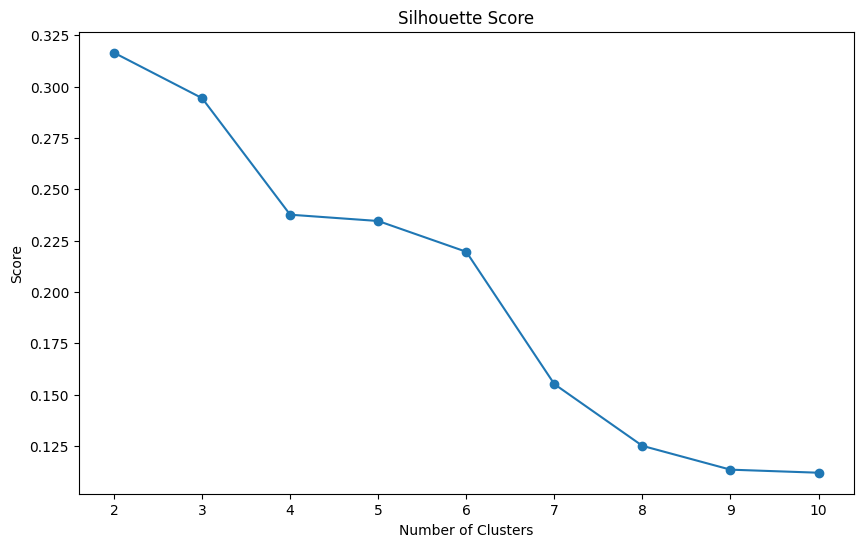

In [28]:
# Checking silhouette score
scores = []
for i in range(2, 11):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(X_train)
    scores.append(silhouette_score(X_train, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()

Adult dataset

In [29]:
# Using adult data
# Some preprocessing steps
features_df = pd.read_csv('data/adult_data_features.csv')

# Replacing "?" with np.NaN
features_df = features_df.replace("?", np.nan)

# Dropping all rows with one or more null attributes
features_df = features_df.dropna()

# Dropping 'education' column since 'education-num' is the same column in numerical format
# Dropping 'fnlgwt' since don't know what it means
# features_df[['education', 'education-num']]
features_df = features_df.drop(['education', 'fnlwgt'], axis=1)

# Converting all categorical variables using one hot encoding
features_df = pd.get_dummies(features_df, columns=['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'native-country', 'sex'], dtype='int')

# Changing dtype to float
features_df = features_df.astype('float')

# Get corresponding labels
labels = pd.read_csv('data/adult_data_targets.csv')
labels = labels.loc[features_df.index, :]

# Sanitizing the labels by replacing "<=50K." with "<=50K" and ">50K." with ">50K"
labels.replace({"<=50K.": "<=50K", ">50K.": ">50K"}, inplace=True)

# Change the labels to 0 and 1
labels = labels.map(lambda x : 1 if x == ">50K" else 0)

labels.value_counts()

# Standardize the data for all features except the categorical variables
scaler = StandardScaler()
features_df.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] = scaler.fit_transform(features_df.loc[:,['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=seed_value, stratify=labels)


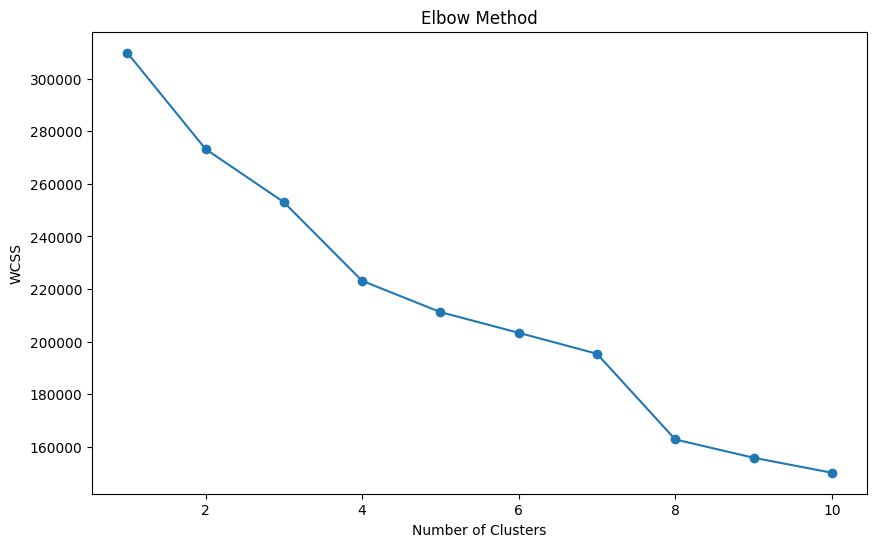

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

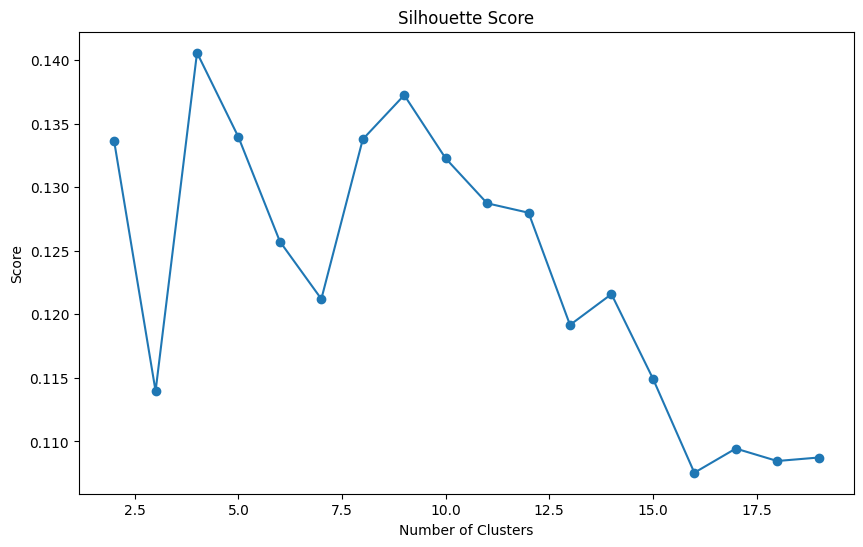

In [36]:
# Checking silhouette score
# scores = []
# for i in range(2, 20):
#     kmeans = KMeans(n_clusters=i, random_state=42)
#     cluster_labels = kmeans.fit_predict(X_train)
#     scores.append(silhouette_score(X_train, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
# plt.xscale(1, 'linear')
plt.ylabel('Score')
plt.show()

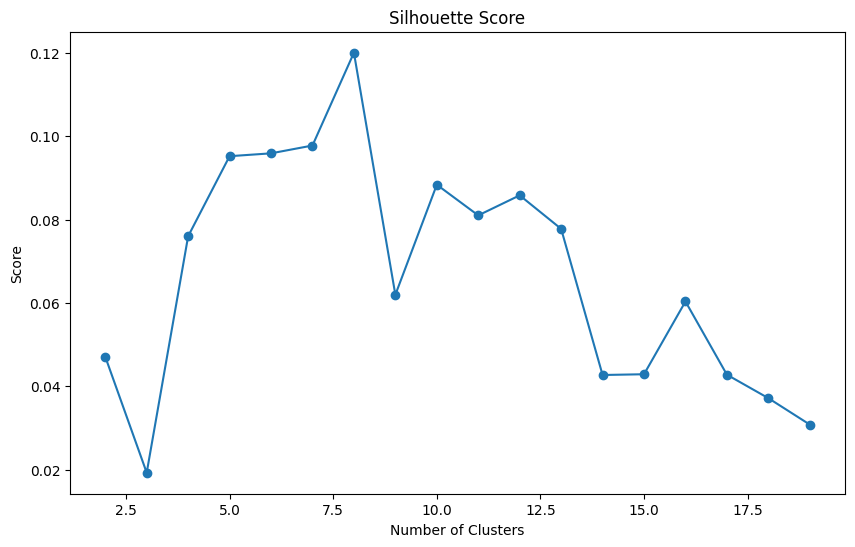

In [37]:
# Test gaussian mixture model
# Checking silhouette score
scores = []
for i in range(2, 20):
    gmm = GaussianMixture(n_components=i, random_state=42)
    cluster_labels = gmm.fit_predict(X_train)
    scores.append(silhouette_score(X_train, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(range(2, 20), scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.show()